Alex Thornton (apt2141)  
Columbia University Fall 2021  
ELEN E6713 - 5G Communications  
Homework 1


## Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Constants
from math import pi
c = 3e8

## Q1)
*Plot (preferably on one graph) the free-space path loss as a function of distance (between Tx
and Rx) for the following bands: 700 MHz, 1900 MHz, 2.4 GHz, 5.5 GHz, 28 GHz, 39 MHz, 60
GHz, 73 GHz.*

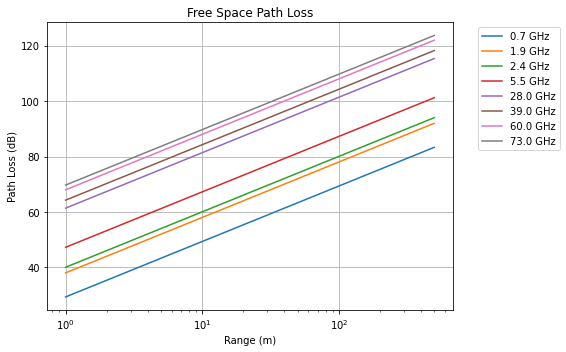

In [ ]:
const_loss = 20*np.log10(4*pi/c)
f = np.array([700*1e6, 1900*1e6, 2.4*1e9, 5.5*1e9, 28*1e9, 39*1e9, 60*1e9, 73*1e9])
r = np.linspace(1, 500, num=100)
fspl = np.zeros((f.size,r.size))
for i in range(f.size):
    fspl[i,:] = const_loss + 20*np.log10(f[i]) + 20*np.log10(r)
#Plot
fig = plt.figure()
fig.set_size_inches(8, 5)
plt.xlabel("Range (m)")
plt.ylabel("Path Loss (dB)")
plt.title("Free Space Path Loss")
plt.grid()
for i in range(f.size):
    plt.semilogx(r,fspl[i,:],label=str(f[i]/1e9)+ " GHz")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

## Q2)
*Plot (preferably on one graph) the median NLOS path loss as a function of distance (assume
reference point of 1 m) for 2.1 GHz, 28 GHz and 39 GHz communications systems characterized
by path loss exponents of n2.1=2.7, n28=4.4 and n39=3.6, respectively.*

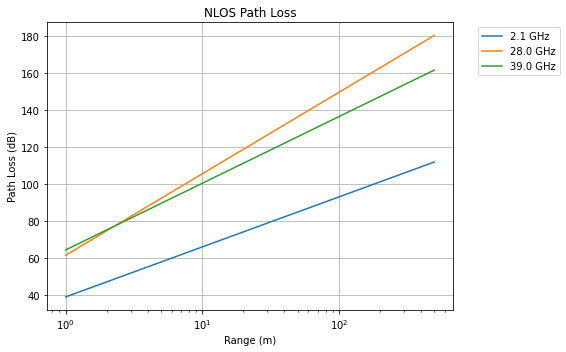

In [ ]:
f = np.array([2.1*1e9, 28*1e9, 39*1e9])
r = np.linspace(1, 500, num=100)
n = np.array([2.7, 4.4, 3.6])

nlospl = np.zeros((f.size,r.size))
for i in range(f.size):
    nlospl[i,:] = 20*np.log10(4*pi/c) + 20*np.log10(f[i]) + 10*n[i]*np.log10(r)
#Plot
fig = plt.figure()
fig.set_size_inches(8, 5)
plt.xlabel("Range (m)")
plt.ylabel("Path Loss (dB)")
plt.title("NLOS Path Loss")
plt.grid()
for i in range(f.size):
    plt.semilogx(r,nlospl[i,:],label=str(f[i]/1e9)+ " GHz")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

## Q3)
*For the 28 GHz mobile communications system in 2, plot the CDF function of the path loss,
and find the maximum path-loss for which 95% of the path-loss values are lower. Assume that
the path loss has a log-normal distribution (in dB) with s28=9.1 dB. For plotting the CDF function
you can use 1000 (or more) events.*

95th percentile path-loss: 76.0


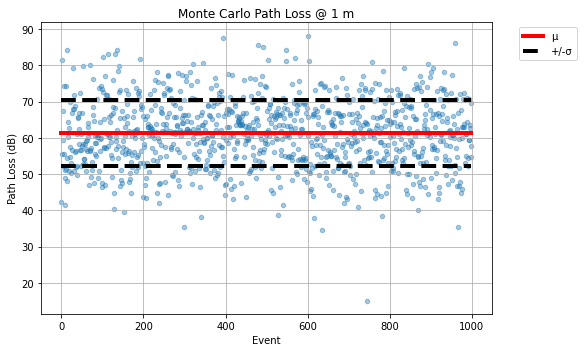

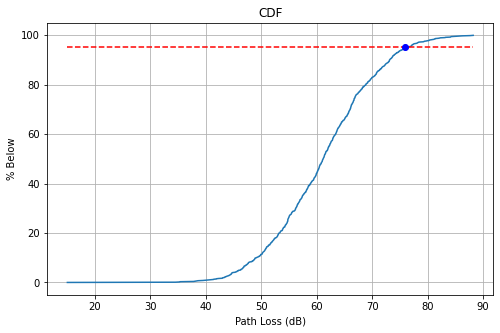

In [ ]:
f = 28*1e9
r = 1
n = 4.4
mu = 20*np.log10(4*pi/c) + 10*n*np.log10(r) + 20*np.log10(f) #Free space path loss @ 1m is mean
sigma = 9.1
num_event = 1000
pct_above = 95

#Monte Carlo Simulation for CDF
event = np.random.normal(mu, sigma, num_event)
cdf = np.sort(event)
idx_max = np.round(pct_above/100*num_event).astype(int)
value_max = np.round(cdf[idx_max])
print("95th percentile path-loss: " + str(value_max))


#Plot Monte Carlo
fig = plt.figure()
fig.set_size_inches(8.22, 5)
plt.xlabel("Event")
plt.ylabel("Path Loss (dB)")
plt.title("Monte Carlo Path Loss @ 1 m")
plt.scatter(np.arange(event.size),event,s= 20,alpha=0.4)
plt.plot(np.arange(event.size),mu*np.ones(event.size),'r',linewidth=4,label="\u03BC")
plt.plot(np.arange(event.size),(mu+sigma)*np.ones(event.size),'k--',linewidth=4,label="+/-\u03C3")
plt.plot(np.arange(event.size),(mu-sigma)*np.ones(event.size),'k--',linewidth=4)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

#Plot CDF
fig = plt.figure()
fig.set_size_inches(8, 5)
plt.xlabel("Path Loss (dB)")
plt.ylabel("% Below")
plt.title("CDF")
plt.plot(cdf,np.arange(event.size)/event.size*100)
plt.plot(cdf,pct_above*np.ones_like(cdf),'r--')
plt.plot(value_max,pct_above,'bo') 
plt.grid()

> <strong> Path-loss of 76.0 dB is above approximately 95% of measurements. By sorting data obtained through a Monte-Carlo simulation, the CDF was obtained. The relative index of this data is it's percentile. <strong>

## Q4)
*For a backhaul application, plot and compare the LOS path loss as a function of distance (up
to 5 km) of 60 GHz and 80 GHz communications systems. Include the atmospheric
attenuation/absorption and assume rain fall rate of 25 mm/hr in your calculations. Explain why
the 80 GHz (E-band) is more suitable for longer range backhaul (> 1km) and 60 GHz (V-band) for
shorter distances (<1km).*

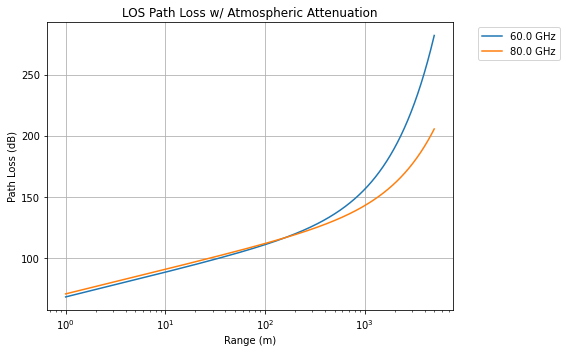

In [ ]:
f = np.array([60e9, 80e9])
rain_attn = np.array([8,12]) #Estimated from slide 37, lecture notes 2
atmo_attn = np.array([20,.2]) #From slide 36, lecture notes 2
r = r = np.linspace(1, 5000, num=1000)
pl = np.zeros((f.size,r.size))
for i in range(f.size):
    pl[i,:] = const_loss + 20*np.log10(f[i]) + 20*np.log10(r) + rain_attn[i]*r/1000 + atmo_attn[i]*r/1000
#Plot
fig = plt.figure()
fig.set_size_inches(8, 5)
plt.xlabel("Range (m)")
plt.ylabel("Path Loss (dB)")
plt.title("LOS Path Loss w/ Atmospheric Attenuation")
plt.grid()
for i in range(f.size):
    plt.semilogx(r,pl[i,:],label=str(f[i]/1e9)+ " GHz")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

> <strong> Lower frequency signals experience lower attenuation in free space. For ranges under about 200m, atmospheric effects are somewhat negligible, so the 60GHz signal is preferable. Beyond 200m, atmospheric effects become non-negligible, and a significant gap begins to grow. Beyond this point, 80GHz signals experience much less attenuation than 60GHz. <strong>